In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import twitter
import json
from nltk import word_tokenize
import nltk
import string
import re
import io
import itertools
import ast
import pandas as pd 
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Input, Lambda, Bidirectional, Dense, Dropout,LSTM
from tensorflow.keras.models import Model
import tensorflow.keras.layers
import tensorflow.keras.backend as K
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Clean Data

In [2]:
def tweet_function2(fname): 

        
    data =[]

    text=[]
    
    
    file = open(fname, "r")
    for line in file:
        data.append(json.loads(line))
 
    for i in data:
        
        data = i['text']
        
        
        data = re.sub('https?:\/{2}[\d\w]+\.([\d\w]+)*(\/[^\s]*)*', ' ', data)  #to get rid of links
            # to get rid of all emoticons
        data=re.sub(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])|([\U0001F600-\U0001F64F])|([\U0001F300-\U0001F5FF])|([\U0001F680-\U0001F6FF])|([\U0001F1E0-\U0001F1FF])|([\U00002702-\U000027B0])|([\U000024C2-\U0001F251])','', data)
            #data[i]["text"] = emoji.get_emoji_regexp().sub(u'', data[i]["text"])
            # to get rid of all the # and  @ words as it can be found in the json file tags
        data=re.sub(r'(\s)@\w+|(\s)#\w+', r'\1',data)
            #to get rid of RT from the tweet text
        data=re.sub(r'RT : ',' ',data)
        data=re.sub('[\.]+', ' ',data)
            # to get rid of all new line char
        data = re.sub('\n+|\t+', ' ', data)
        data= re.sub(r"\b[a-zA-Z]\b", " ", data)
        data = re.sub(r'\W',' ',data)
        data = re.sub(r'\s+',' ',data)
        data=' '.join(word.strip(string.punctuation) for word in data.split(' '))
        if data != " ":
            text.append(data)
        #data=nltk.word_tokenize(data)
        #print(data)
       
        
    return text



clean_data2=tweet_function2('tweets2_la.json')
clean_data3=tweet_function2('tweets3_sea.json')
clean_data5=tweet_function2('tweets5_nyc_nohatenofear.json')
clean_data9=tweet_function2('tweets9_australiafires.json')
clean_data11=tweet_function2('tweets11_fightinlon.json')
clean_data12=tweet_function2('tweets12_womensmarchsanfran.json')
clean_data13=tweet_function2('tweets13_march4lifeAustin.json')
clean_data14=tweet_function2('tweets14_march4lifeDC.json')
clean_data15=tweet_function2('tweets15_antifaNYC.json')
clean_data17=tweet_function2('tweets17_transrightsSea.json')
clean_data18=tweet_function2('tweets18_antifaPdx.json')
clean_dataChar=tweet_function2('Char.json')

Data Frame

In [3]:
#combine the lists
zero_viol = clean_data2 + clean_data3
#create df from the list
df_zero_viol=pd.DataFrame(zero_viol,columns=["Tweet"])
#add the violence column
df_zero_viol['Violence_Level']=0
df_zero_viol

,Tweet,Violence_Level
0,Los Angeles Dodgers LED Flashlight,0
1,Los Angeles Dodgers LED Flashlight,0
2,If you re in the Los Angeles CA area stop by a...,0
3,LA today,0
4,Jane Lynch calls out Elizabeth Warren on behal...,0
...,...,...
3021,Merry Christmas and Happy Holidays from all ou...,0
3022,JaValle donate direct to those in need This i...,0
3023,Agency Employees Volunteer Support for Kids in...,0
3024,Lime to pull bikes from Seattle bring them bac...,0


In [4]:
low_viol = clean_data13+clean_data5+clean_data9+clean_data11+clean_data12+clean_data14+clean_data15

#create df from the list
df_low_viol=pd.DataFrame(low_viol,columns=["Tweet"])
#add the violence column
df_low_viol['Violence_Level']=1
df_low_viol

,Tweet,Violence_Level
0,got to speak with Rep Chip Roy yesterday at t...,1
1,got to speak with Rep Chip Roy yesterday at t...,1
2,got to speak with Rep Chip Roy yesterday at t...,1
3,March For Life Thousands of Pro Life Texans M...,1
4,March For Life Thousands of Pro Life Texans M...,1
...,...,...
19160,People calling protesters are really on to so...,1
19161,People calling protesters are really on to so...,1
19162,People calling protesters are really on to so...,1
19163,People calling protesters are really on to so...,1


In [5]:
med_viol = clean_data18+clean_data17
#create df from the list
df_med_viol=pd.DataFrame(med_viol,columns=["Tweet"])
#add the violence column
df_med_viol['Violence_Level']=2
df_med_viol

,Tweet,Violence_Level
0,ANTIFADomesticTerrorism,2
1,To bad we have no leads on an radical organiza...,2
2,AntifaTerrorists,2
3,saved Dr Cornel West life when the cops would...,2
4,saved Dr Cornel West life when the cops would...,2
...,...,...
1335,This Friday What is Love doodle,2
1336,This Friday What is Love doodle,2
1337,This Friday What is Love doodle,2
1338,This Friday What is Love doodle,2


In [6]:
high_viol=clean_dataChar
#create df from the list
df_high_viol=pd.DataFrame(high_viol,columns=["Tweet"])
#add the violence column
df_high_viol['Violence_Level']=3
df_high_viol

,Tweet,Violence_Level
0,JoyAnnReid here that reaction shot you were l...,3
1,Well Mnuchin and Cohn can just fuck right off ...,3
2,Good Read Alt right sites believe the counter ...,3
3,Very fine people do not associate with Nazis ...,3
4,guardian Great article but small correction t...,3
...,...,...
4802,Thoughtful intelligent dialogue on tonight mis...,3
4803,In Charlottesville the Local Jewish Community ...,3
4804,After Charlottesville Trump business buddies h...,3
4805,PLEASE RETWEET THIS if you were angered and or...,3


In [7]:
combine_dataset=pd.concat([df_zero_viol,df_low_viol,df_med_viol,df_high_viol])

In [8]:
combine_dataset

,Tweet,Violence_Level
0,Los Angeles Dodgers LED Flashlight,0
1,Los Angeles Dodgers LED Flashlight,0
2,If you re in the Los Angeles CA area stop by a...,0
3,LA today,0
4,Jane Lynch calls out Elizabeth Warren on behal...,0
...,...,...
4802,Thoughtful intelligent dialogue on tonight mis...,3
4803,In Charlottesville the Local Jewish Community ...,3
4804,After Charlottesville Trump business buddies h...,3
4805,PLEASE RETWEET THIS if you were angered and or...,3


In [9]:
combine_dataset = combine_dataset.sample(frac = 1)

In [10]:
combine_dataset

,Tweet,Violence_Level
3331,Standing GlobalRabbi amp thousands of other N...,1
3552,This is who your company associated with,3
2724,Why should Catholics stand with our Jewish br...,1
7846,If hazard reduction is the solution why did t...,1
13298,Had great afternoon and performing in Whitehal...,1
...,...,...
17859,Antifa unveils new slogans in effort to suppo...,1
17439,agree there needs to be some change with the ...,1
1534,stand in solidarity our Jewish brothers and s...,1
6899,Can we please stop using the new normal in rel...,1


In [11]:
train_validate, test = combine_dataset[0:26000], combine_dataset[26000:] #divide data for train+validation and test

In [12]:
train_validate

,Tweet,Violence_Level
3331,Standing GlobalRabbi amp thousands of other N...,1
3552,This is who your company associated with,3
2724,Why should Catholics stand with our Jewish br...,1
7846,If hazard reduction is the solution why did t...,1
13298,Had great afternoon and performing in Whitehal...,1
...,...,...
15319,wmarchsf,1
7934,If hazard reduction is the solution why did t...,1
10479,Australia devastating bushfires have brought ...,1
516,See virtual tour of one of our newest ACADIAN ...,0


In [13]:
test

,Tweet,Violence_Level
18760,People calling protesters are really on to so...,1
8934,ScottyfromMarketing has had lot more advice o...,1
7337,insiders The most infuriating interview sudde...,1
11982,Doesn really do it justice but just part of S...,1
18244,Masked bigots scream and resist arrest at the...,1
...,...,...
17859,Antifa unveils new slogans in effort to suppo...,1
17439,agree there needs to be some change with the ...,1
1534,stand in solidarity our Jewish brothers and s...,1
6899,Can we please stop using the new normal in rel...,1


In [16]:
X = train_validate[train_validate.columns[0]]
y_int = train_validate.drop(combine_dataset.columns[0], axis = 1)

In [17]:
#To Categorical Data
from keras.utils import to_categorical
y = to_categorical(train_validate['Violence_Level'])

ELMo

In [2]:
import keras
import keras.utils
from keras import utils as np_utils

Using TensorFlow backend.


In [3]:
embed = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)
def ELMoEmbedding(x):
    return embed(tf.squeeze(tf.cast(x, tf.string)), signature="default", as_dict=True)["default"]

In [4]:
def build_model(): 
    input_text = Input(shape=(1,), dtype=tf.string)
    embedding = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
    dense = Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(embedding)
    pred = Dense(4, activation='softmax')(dense)
    model = Model(inputs=[input_text], outputs=pred)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model_elmo = build_model()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
model_elmo.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
lambda (Lambda)              (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               262400    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 263,428
Trainable params: 263,428
Non-trainable params: 0
_________________________________________________________________


In [37]:
#Train and Validate
with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer())  
    session.run(tf.tables_initializer())
    history = model_elmo.fit(X, y, epochs=1, batch_size=256, validation_split = 0.2)
    model_elmo.save_weights('./model_elmo_weights.h5')

Train on 20800 samples, validate on 5200 samples
20800/20800 [==============================] - 2019s 97ms/sample - loss: 0.7158 - acc: 0.8670 - val_loss: 0.4444 - val_acc: 0.9460


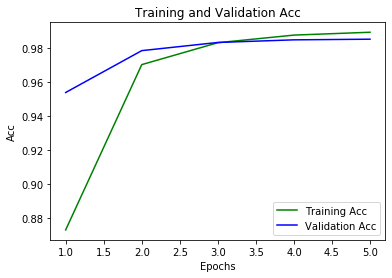

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

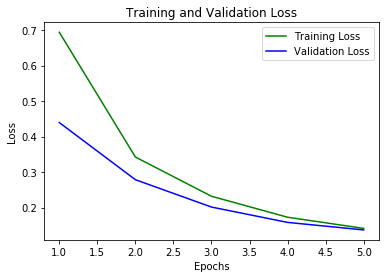

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
print(model_elmo)

In [25]:
#Test
X_test2 = test[test.columns[0]]
y_int = test.drop(test.columns[0], axis = 1)

In [26]:
X_test2

18760     People calling protesters are really on to so...
8934      ScottyfromMarketing has had lot more advice o...
7337      insiders The most infuriating interview sudde...
11982     Doesn really do it justice but just part of S...
18244     Masked bigots scream and resist arrest at the...
                               ...                        
17859     Antifa unveils new slogans in effort to suppo...
17439     agree there needs to be some change with the ...
1534      stand in solidarity our Jewish brothers and s...
6899     Can we please stop using the new normal in rel...
7676      In solidarity with everyone who protested ton...
Name: Tweet, Length: 2338, dtype: object

In [27]:
from keras.utils import to_categorical
y_test = to_categorical(test['Violence_Level'])

In [38]:
with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer())  
    session.run(tf.tables_initializer())
    model_elmo = build_model() 
    model_elmo.load_weights('./model_elmo_weights.h5')
    predicts = model_elmo.predict(X_test2)
    print(predicts)
    results = model_elmo.evaluate(X_test2, y_test, batch_size=256)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


[[1.2877660e-03 9.9126726e-01 3.7955204e-03 3.6493330e-03]
 [3.4809235e-02 9.3259770e-01 1.0523255e-02 2.2069901e-02]
 [2.5993226e-02 6.1234230e-01 4.9134996e-03 3.5675094e-01]
 ...
 [3.3815735e-04 9.4387215e-01 1.6339658e-02 3.9450034e-02]
 [3.6480722e-03 9.8125744e-01 9.6925441e-03 5.4018921e-03]
 [8.5539352e-03 9.2455178e-01 5.4010870e-03 6.1493240e-02]]
2338/2338 [==============================] - 244s 104ms/sample - loss: 0.4446 - acc: 0.9491


In [35]:
model_elmo.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 1028      
Total params: 263,428
Trainable params: 263,428
Non-trainable params: 0
_________________________________________________________________
